# NEXT GENERATION MUSIC PREDICTOR SYSTEM 

* Problem Statement: NextGen Music system will predict how popular a new song will be. We are trying to investigate how old songs can be used to predict the popularity of the new songs based on the features of the song and their past popularity on old songs from 1991-2018. We will focus on few points like certain characteristics for hit songs and does the new song fall under this hit criteria.It can help a music company to decide the features/genre of the new music album so that it has high chances of success.

* Data Set: We have used Spotify data set for the analysis. Data set containing audio data from 1991- 2018 and 3 listener data set. Now we have merged the data of 27 years into one combined file named  "combined.csv" which we are reading on the notebook below.

In [69]:
import os
import glob 
import pandas as pd
import zipfile

In [70]:
where_zip_is = '/home/alium/Downloads/'

In [71]:
zip_ref = zipfile.ZipFile(where_zip_is+'spotify_data_for_students.zip', 'r')
zip_ref.extractall('team23_working_dir')
zip_ref.close()

In [72]:
path = where_zip_is+'team23_working_dir/spotify_data_for_students/music_data'

In [76]:
# following is borrowed from https://medium.freecodecamp.org/how-to-combine-multiple-csv-files-with-8-lines-of-code-265183e0854
os.chdir(path)

extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
combined_csv.to_csv( "combined_csv.csv", index=False)

In [77]:
music = pd.read_csv(path+'/combined_csv.csv')

In [79]:
print(music.head(1))
print(music.shape)

   Unnamed: 0  acousticness                album_id album_name  \
0           0        0.0227  49Teqcxp4dOBayTBtR3j5W       1999   

                                        analysis_url  \
0  https://api.spotify.com/v1/audio-analysis/05mA...   

                                      artist_ids            artist_names  \
0  25uiPmTg16RbhZWAqwLBy5,3WGpXCj9YhhfX11TToZcXP  Charli XCX,Troye Sivan   

   danceability  disc_number  duration_ms   ...    popularity  \
0         0.739            1       189000   ...            84   

                                         preview_url                 song_id  \
0  https://p.scdn.co/mp3-preview/18e5f087ee0be8f2...  05mAIVLkIWc2d1UBYZBCp8   

   song_name  speechiness    tempo  time_signature  \
0       1999       0.0329  124.016             4.0   

                                          track_href track_number valence  
0  https://api.spotify.com/v1/tracks/05mAIVLkIWc2...            1   0.659  

[1 rows x 26 columns]
(265120, 26)


### Heavy duty cleaning

In [80]:
music.isnull().sum()

Unnamed: 0              0
acousticness            0
album_id                0
album_name              0
analysis_url            0
artist_ids              0
artist_names            0
danceability            1
disc_number             0
duration_ms             0
energy                  0
instrumentalness        0
key                     0
liveness                0
loudness                0
mode                    0
popularity              0
preview_url         35105
song_id                 0
song_name               0
speechiness             1
tempo                   0
time_signature          1
track_href              0
track_number            0
valence                 1
dtype: int64

In [81]:
music_backup=music
music = music.drop(['preview_url'],axis=1)

In [82]:
music=music.dropna()
music.isnull().sum()

Unnamed: 0          0
acousticness        0
album_id            0
album_name          0
analysis_url        0
artist_ids          0
artist_names        0
danceability        0
disc_number         0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
popularity          0
song_id             0
song_name           0
speechiness         0
tempo               0
time_signature      0
track_href          0
track_number        0
valence             0
dtype: int64

In [92]:
music.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 265119 entries, 0 to 265119
Data columns (total 14 columns):
acousticness         265119 non-null float64
danceability         265119 non-null float64
energy               265119 non-null float64
instrumentalness     265119 non-null float64
key                  265119 non-null int64
liveness             265119 non-null float64
loudness             265119 non-null float64
mode                 265119 non-null int64
popularity           265119 non-null int64
speechiness          265119 non-null float64
tempo                265119 non-null float64
time_signature       265119 non-null float64
valence              265119 non-null float64
Popularity_factor    265119 non-null int64
dtypes: float64(10), int64(4)
memory usage: 30.3 MB


### Looks better!

* We will be dropping  unnecessary columns (Attributes) which are not required for our analysis.

In [ ]:
#drop the unecessary columns
music=music.drop(['Unnamed: 0','album_id','artist_ids','song_name','artist_names','album_name','analysis_url','disc_number','duration_ms','song_id','track_href','track_number'], axis=1)

* Calculation of mean is done and this is the most important part as we will be considering the Song hit prediction based on the mean value of the popularity attribute.

In [94]:
#calculating the mean of popularity
pop_mean=music["popularity"].mean()
pop_mean

9.819801673965276

* Sorting the data based on the " Popularity Attribute " which has popularity value greater than the Mean value of the dataset. Where "1" and "0" are named as the indicator wheather it is greater than mean or not. If it is 1 then True it is greater, else "0" and new attribute is generated as "Popularity_Factor".

In [97]:
# making a series where true is entered if popularity value>mean else False
popularity_factor=music["popularity"]>pop_mean
#adding popularity factor as a column to the music dataframe with values as 0 and 1
music["Popularity_factor"]=popularity_factor.astype(int)
music.head()


,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,time_signature,valence,Popularity_factor
0,0.0227,0.739,0.742,0.000001,7,0.2290,-4.586,1,84,0.0329,124.016,4.0,0.659,1
1,0.2530,0.811,0.570,0.000000,5,0.1480,-8.093,1,72,0.1290,128.066,4.0,0.814,1
2,0.9560,0.176,0.153,0.000120,0,0.1580,-15.969,1,69,0.0365,84.741,1.0,0.157,1
3,0.1370,0.866,0.730,0.000000,5,0.0843,-8.201,1,67,0.0767,118.523,4.0,0.625,1
4,0.8040,0.607,0.103,0.000000,9,0.0760,-14.405,1,68,0.0404,110.378,4.0,0.341,1


In [101]:
X=music[feature_cols]
Y=music['Popularity_factor']

* Splitting up of test and train data

In [103]:
from sklearn.model_selection import train_test_split

In [104]:
from sklearn import model_selection
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30)
print(X_train.shape)
print(X_test.shape)

(185583, 10)
(79536, 10)


* We are applying "Logistic Regression" on the Test and Train data to predict wheather the future songs  would be a "Hit" or a "Not Hit".

In [106]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
model = LogisticRegression()
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
matrix = confusion_matrix(Y_test, predicted)

* Evaluating the model with confusion matrix and classification Report for "Logistic Regression Model".

In [107]:
import numpy as np
from sklearn.metrics import classification_report
predicted = model.predict(X_test)
matrix = confusion_matrix(Y_test, predicted)
print("Confusion Matrix:")
print(matrix)
report = classification_report(Y_test, predicted)
print("Classification Report:")
print(report)
accuracy=np.mean(predicted==Y_test)
print("Accuracy is: ",accuracy)

#The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.
#The recall is the ratio t / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.
#The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.
#The F-beta score weights recall more than precision by a factor of beta. beta == 1.0 means recall and precision are equally important.
#The support is the number of occurrences of each class in y_true.

Confusion Matrix:
[[44348  4259]
 [25100  5829]]
Classification Report:
             precision    recall  f1-score   support

          0       0.64      0.91      0.75     48607
          1       0.58      0.19      0.28     30929

avg / total       0.61      0.63      0.57     79536

Accuracy is:  0.6308715550191109


* Plotting the Confusion matrix "Without Normalization" and with "Normalization".

Confusion matrix, without normalization
[[44348  4259]
 [25100  5829]]
Normalized confusion matrix
[[0.91 0.09]
 [0.81 0.19]]


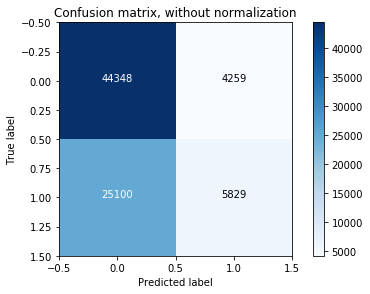

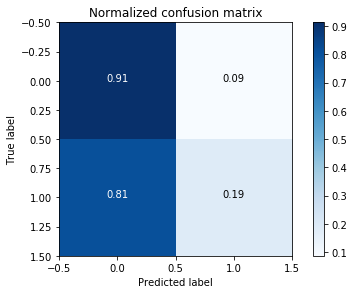

In [110]:
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
 
    print(cm)
 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
 
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
 
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
 
# Compute confusion matrix
np.set_printoptions(precision=2)
 
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(matrix,
                      title='Confusion matrix, without normalization')
 
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(matrix, normalize=True,
                      title='Normalized confusion matrix')
 
plt.show()

* We are applying "Random Forest" on the Test and Train data to predict wheather the future songs  would be a "Hit" or a "Not Hit".

### ExtraTreesClassifier*  vs RandomForestClassifier 

* from https://stackoverflow.com/questions/22409855/randomforestclassifier-vs-extratreesclassifier-in-scikit-learn  
... the differences for ET:

    1) When choosing variables at a split, samples are drawn from the entire training set instead of a bootstrap sample of the training set.

    2) Splits are chosen completely at random from the range of values in the sample at each split.

    The result from these two things are many more "leaves".

* ET is mostly used to see feature importance

In [122]:
from sklearn.ensemble import ExtraTreesClassifier 
forest = ExtraTreesClassifier(n_estimators=20)

forest.fit(X, Y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
fnames = [feature_cols[i] for i in indices]

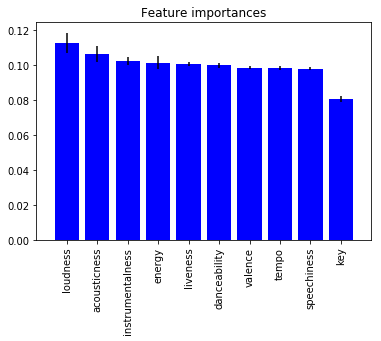

In [123]:
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="b", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), fnames, rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

* Predicting the accuracy for "Random Forest" Model.

In [127]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=20)

#fit the data
rfc.fit(X_train,Y_train)

Y_pred_rfc=rfc.predict(X_test)

matrix_rfc = confusion_matrix(Y_test, Y_pred_rfc)

In [128]:
print("Confusion Matrix:")
print(matrix_rfc)
report_rfc = classification_report(Y_test, Y_pred_rfc)
print("Classification Report:")
print(report_rfc)
accuracy_rfc=np.mean(Y_pred_rfc==Y_test)
print("Accuracy for rfc: ",accuracy_rfc)

Confusion Matrix:
[[40786  7821]
 [17558 13371]]
Classification Report:
             precision    recall  f1-score   support

          0       0.70      0.84      0.76     48607
          1       0.63      0.43      0.51     30929

avg / total       0.67      0.68      0.67     79536

Accuracy for rfc:  0.6809117883725608


Confusion matrix, without normalization
[[40786  7821]
 [17558 13371]]
Normalized confusion matrix
[[0.84 0.16]
 [0.57 0.43]]


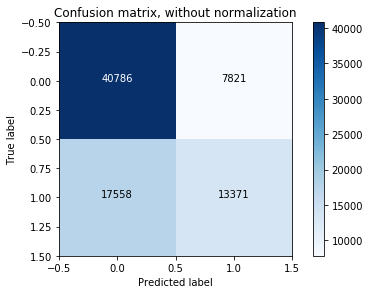

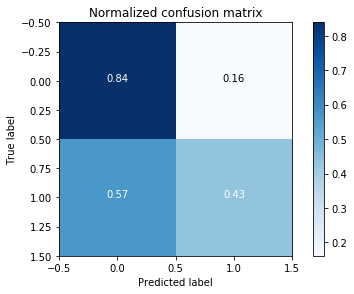

In [129]:
matrix_rfc = confusion_matrix(Y_test, Y_pred_rfc)
 

def plot_confusion_matrix(cm,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
 
    print(cm)
 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
 
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
 
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
 
# Compute confusion matrix
np.set_printoptions(precision=2)
 
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(matrix_rfc,
                      title='Confusion matrix, without normalization')
 
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(matrix_rfc, normalize=True,
                      title='Normalized confusion matrix')
 
plt.show()

* We are applying "K-Nearest Neigbor" on the Test and Train data to predict wheather the future songs  would be a "Hit" or a "Not Hit".

In [130]:
#knn
from sklearn import neighbors
knn=neighbors.KNeighborsClassifier(n_neighbors=100,weights='uniform')
knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=100, p=2,
           weights='uniform')

In [131]:
#knn prediction
Y_pred_knn=knn.predict(X_test)

matrix_knn = confusion_matrix(Y_test, Y_pred_knn)

In [132]:
#Evaluation
from sklearn.metrics import classification_report
#predicted = model.predict(X_test)
#matrix = confusion_matrix(Y_test, predicted)
print("Confusion Matrix:")
print(matrix_knn)
report_knn = classification_report(Y_test, Y_pred_knn)
print("Classification Report:")
print(report_knn)
accuracy_knn=np.mean(Y_pred_knn==Y_test)
print("Accuracy for rfc: ",accuracy_knn)

Confusion Matrix:
[[42627  5980]
 [24283  6646]]
Classification Report:
             precision    recall  f1-score   support

          0       0.64      0.88      0.74     48607
          1       0.53      0.21      0.31     30929

avg / total       0.59      0.62      0.57     79536

Accuracy for rfc:  0.619505632669483


Confusion matrix, without normalization
[[42627  5980]
 [24283  6646]]
Normalized confusion matrix
[[0.88 0.12]
 [0.79 0.21]]


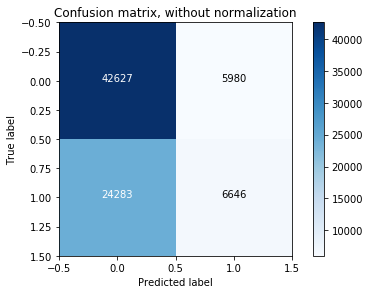

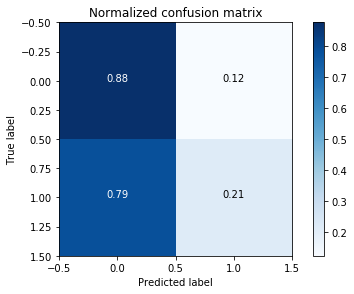

In [133]:
matrix_knn = confusion_matrix(Y_test, Y_pred_knn)
 

def plot_confusion_matrix(cm,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
 
    print(cm)
 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
 
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
 
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
 
# Compute confusion matrix
np.set_printoptions(precision=2)
 
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(matrix_knn,
                      title='Confusion matrix, without normalization')
 
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(matrix_knn, normalize=True,
                      title='Normalized confusion matrix')
 
plt.show()

* Cross- validation accuracy for every model is shown below.

In [134]:
# Random forest with cv
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rfc, X, Y, scoring='accuracy', cv=5)
print (scores)
print (scores.mean())
scores_random_Forest=scores.mean()
print(scores_random_Forest)

[0.66 0.68 0.63 0.66 0.69]
0.6628081114231568
0.6628081114231568


In [135]:
#LOgistic with CV

from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, Y, scoring='accuracy', cv=5)
print (scores)
print (scores.mean())
scores_lr=scores.mean()
print(scores_lr)

[0.62 0.63 0.61 0.63 0.64]
0.6251344531332403
0.6251344531332403


In [136]:
#KNN with CV

#from sklearn.model_selection import cross_val_score
scores_knn = cross_val_score(knn, X, Y, scoring='accuracy', cv=5)
print (scores_knn)
print (scores_knn.mean())

[0.61 0.61 0.59 0.63 0.63]
0.6137735262330979


* Plotting the Accuracies for the model KNN, Logistic Regression and Random Forest.

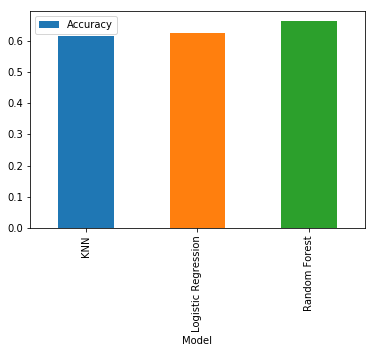

In [137]:
d = {'Model':['KNN','Logistic Regression','Random Forest'],'Accuracy':[scores_knn.mean(),scores_lr,scores_random_Forest]}

agg_scores = pd.DataFrame(data = d)
agg_scores.plot(x='Model',y='Accuracy',kind='bar')

In [138]:
#Random forest confusion matrix with CV
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
Y_pred_rfc_cv = cross_val_predict(rfc,X,Y,cv=5)

In [139]:
print('Confusion Matrix')
matrix_rfc_cv = confusion_matrix(Y, Y_pred_rfc_cv)
print(matrix_rfc_cv)
report_rfc = classification_report(Y, Y_pred_rfc_cv)
print("Classification Report:")
print(report_rfc)
accuracy_rfc_cv=np.mean(Y_pred_rfc_cv==Y)
print("Accuracy for rfc: ",scores_random_Forest)

Confusion Matrix
[[133463  28268]
 [ 60898  42490]]
Classification Report:
             precision    recall  f1-score   support

          0       0.69      0.83      0.75    161731
          1       0.60      0.41      0.49    103388

avg / total       0.65      0.66      0.65    265119

Accuracy for rfc:  0.6628081114231568


* As you can see Accuracy of the Random Forest model is higher as compared to Logistic regression and K- Nearest Neighbor.

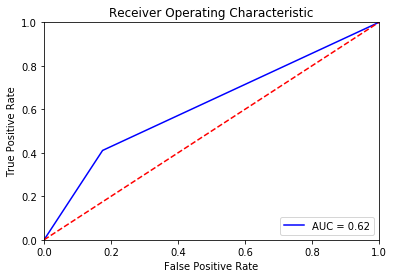

In [140]:
from sklearn.metrics import roc_curve,auc
fpr, tpr, thresholds = roc_curve(Y,Y_pred_rfc_cv)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [142]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 265119 entries, 0 to 265119
Data columns (total 10 columns):
acousticness        265119 non-null float64
danceability        265119 non-null float64
energy              265119 non-null float64
instrumentalness    265119 non-null float64
key                 265119 non-null int64
liveness            265119 non-null float64
loudness            265119 non-null float64
speechiness         265119 non-null float64
tempo               265119 non-null float64
valence             265119 non-null float64
dtypes: float64(9), int64(1)
memory usage: 32.2 MB


# Bayesian approach to the problem

In [156]:
%reset -sf

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### some cleaning first (again)

In [2]:
import glob 
import zipfile

In [3]:
where_zip_is = '/home/alium/Downloads/'

In [4]:
zip_ref = zipfile.ZipFile(where_zip_is+'spotify_data_for_students.zip', 'r')
zip_ref.extractall('team23_working_dir')
zip_ref.close()

In [5]:
where_zip_is = '/home/alium/Downloads/'

In [6]:
path_to_music = where_zip_is+'team23_working_dir/spotify_data_for_students/music_data'
path_to_user = where_zip_is+'team23_working_dir/spotify_data_for_students/user_data'

In [7]:
# following is borrowed from https://medium.freecodecamp.org/how-to-combine-multiple-csv-files-with-8-lines-of-code-265183e0854
os.chdir(path_to_music)

extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

bcombined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
bcombined_csv.to_csv( "combined_music.csv", index=False)

In [8]:
bmusic = pd.read_csv(path_to_music+'/combined_music.csv')
bmusic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3194502 entries, 0 to 3194501
Data columns (total 26 columns):
Unnamed: 0          int64
acousticness        float64
album_id            object
album_name          object
analysis_url        object
artist_ids          object
artist_names        object
danceability        float64
disc_number         int64
duration_ms         int64
energy              float64
instrumentalness    float64
key                 int64
liveness            float64
loudness            float64
mode                int64
popularity          int64
preview_url         object
song_id             object
song_name           object
speechiness         float64
tempo               float64
time_signature      float64
track_href          object
track_number        int64
valence             float64
dtypes: float64(10), int64(7), object(9)
memory usage: 633.7+ MB


In [9]:
# following is borrowed from https://medium.freecodecamp.org/how-to-combine-multiple-csv-files-with-8-lines-of-code-265183e0854
os.chdir(path_to_user)

extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

ccombined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
ccombined_csv.to_csv( "combined_user.csv", index=False)

In [10]:
buser = pd.read_csv(path_to_user+'/combined_user.csv')

In [11]:
buser.head(3)

,Unnamed: 0,acousticness,danceability,database_id,energy,instrumentalness,key,liveness,loudness,mode,preview_url,song_name,speechiness,spotify_id,tempo,user_id,user_response,user_session,valence
0,0.0,0.0904,0.374,5bb7ac930c27ee4c381dd9dc,0.850,0.000000,4,0.116,-5.657,0,NaN,NaN,0.0404,NaN,125.796,0.0,0.0,1.0,0.348
1,1.0,0.3530,0.505,5bb7ac960c27ee4c381dda8b,0.366,0.000014,5,0.124,-9.197,1,NaN,NaN,0.0250,NaN,100.533,0.0,0.0,1.0,0.115
2,2.0,0.0159,0.674,5bb7ac910c27ee4c381dd91b,0.943,0.000000,0,0.504,-3.413,1,NaN,NaN,0.0408,NaN,118.060,0.0,1.0,1.0,0.856


In [12]:
user_data_clean = buser;
music_data_clean = bmusic;

In [13]:
user_data_relevant = user_data_clean.drop(['Unnamed: 0','user_session','user_id','database_id','preview_url','song_name','spotify_id'], axis=1);
# user_data_relevant.info()
music_data_relevant = music_data_clean.drop(['Unnamed: 0','album_id','album_name','analysis_url','artist_ids','artist_names','disc_number','duration_ms','preview_url','song_id','song_name','track_href','track_number'],axis=1);
# music_data_relevant.info()

In [14]:
user_data_relevant=user_data_relevant.sort_index(axis=1);
music_data_relevant=music_data_relevant.sort_index(axis=1);

### Working on user data

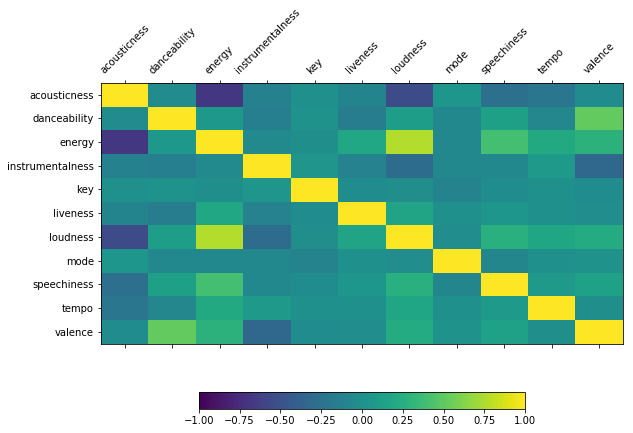

In [15]:
user_data_relevant_no_target=user_data_relevant.drop(['user_response'], 1)
user_correlation=user_data_relevant_no_target.corr(method='spearman')

user_columns = list(user_correlation)

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
cax = ax.matshow(user_correlation, vmin=-1, vmax=1)
fig.colorbar(cax,orientation='horizontal',fraction=.05)
ticks = np.arange(0,11,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
# ax.set_xticklabels(range(1,12))
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
ax.set_xticklabels(user_columns)
ax.set_yticklabels(user_columns)
ax.set_aspect(0.5)
plt.show()

In [16]:
user_correlation=user_correlation.abs()
upper = user_correlation.where(np.triu(np.ones(user_correlation.shape), k=1).astype(np.bool))
# print(upper)

In [17]:
s = user_correlation.unstack()
so = s.sort_values(kind="quicksort")

for i in range(11*11):
    if (so.values[i]>0.5 and so.values[i]!=1.0):
        print (so.index[i],so[i])

('valence', 'danceability') 0.5198425225128611
('danceability', 'valence') 0.5198425225128611
('acousticness', 'loudness') 0.5404305430839798
('loudness', 'acousticness') 0.5404305430839798
('energy', 'acousticness') 0.6734492103089633
('acousticness', 'energy') 0.6734492103089633
('energy', 'loudness') 0.7671293723859236
('loudness', 'energy') 0.7671293723859236


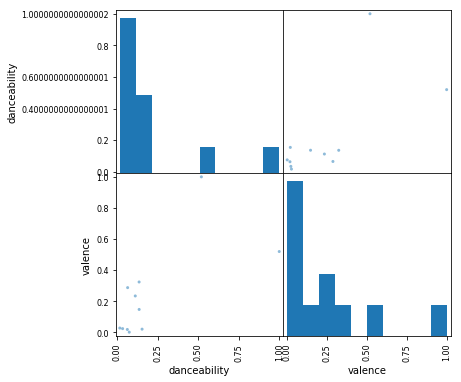

In [18]:
pd_plot0 = user_correlation[['danceability','valence']]
pd.plotting.scatter_matrix(pd_plot0, figsize=(6, 6))
plt.show()

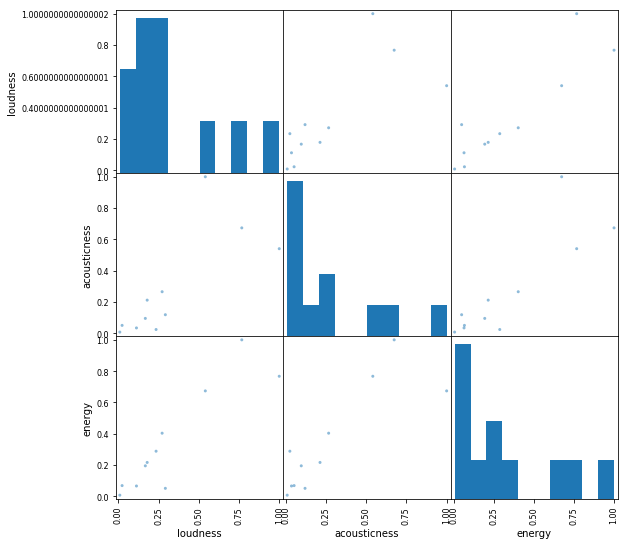

In [19]:
pd_plot1 = user_correlation[['loudness','acousticness','energy']]
pd.plotting.scatter_matrix(pd_plot1, figsize=(9, 9))
plt.show()

### we are removing highly correlated features

In [20]:
to_drop = [column for column in upper.columns if any(upper[column] > 0.5)]
print (to_drop)
user_data_relevant_no_target_fixcorr = user_data_relevant_no_target.drop(to_drop,1)
user_data_relevant_no_target_fixcorr.info()

['energy', 'loudness', 'valence']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16116 entries, 0 to 16115
Data columns (total 8 columns):
acousticness        16116 non-null float64
danceability        16116 non-null float64
instrumentalness    16116 non-null float64
key                 16116 non-null int64
liveness            16116 non-null float64
mode                16116 non-null int64
speechiness         16116 non-null float64
tempo               16116 non-null float64
dtypes: float64(6), int64(2)
memory usage: 1007.3 KB


### looking at low variability 

In [21]:
(user_data_relevant_no_target_fixcorr > 0).all()

acousticness        False
danceability        False
instrumentalness    False
key                 False
liveness            False
mode                False
speechiness         False
tempo               False
dtype: bool

In [22]:
# user_data_relevant_no_target_fixcorr.plot(kind='hist',subplots=True, sharex=False, sharey=False, figsize=(12,12))
# plt.show()
user_data_relevant_no_target_fixcorr.head()

,acousticness,danceability,instrumentalness,key,liveness,mode,speechiness,tempo
0,0.0904,0.374,0.000000,4,0.1160,0,0.0404,125.796
1,0.3530,0.505,0.000014,5,0.1240,1,0.0250,100.533
2,0.0159,0.674,0.000000,0,0.5040,1,0.0408,118.060
3,0.1860,0.602,0.000000,0,0.1220,1,0.0365,118.026
4,0.0876,0.626,0.000077,8,0.0801,0,0.0339,149.990


In [23]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
scaler = MinMaxScaler()
# print(scaler.fit(user_data_relevant_no_target_fixcorr))
# print(scaler.data_max_)
# print(scaler.transform(user_data_relevant_no_target_fixcorr))

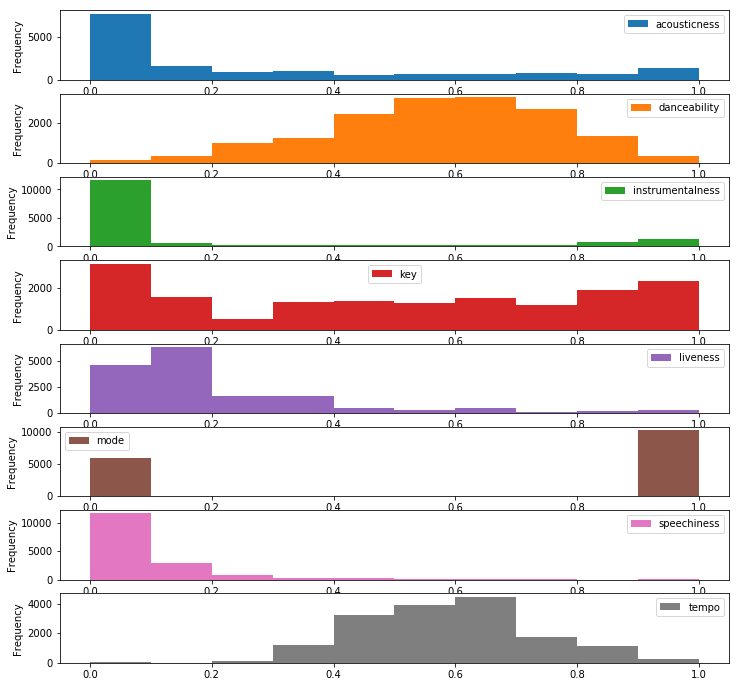

In [25]:
scaled_user_data_relevant_no_target_fixcorr = pd.DataFrame(scaler.fit_transform(user_data_relevant_no_target_fixcorr),columns = user_data_relevant_no_target_fixcorr.columns)
scaled_user_data_relevant_no_target_fixcorr.plot(legend=True,kind='hist',subplots=True, sharex=False, sharey=False, figsize=(12,12))
plt.show()

In [26]:
scaled_user_data_relevant_no_target_fixcorr.head()

,acousticness,danceability,instrumentalness,key,liveness,mode,speechiness,tempo
0,0.090854,0.389583,0.000000,0.363636,0.119097,0.0,0.054521,0.604908
1,0.354774,0.526042,0.000014,0.454545,0.127310,1.0,0.033738,0.483427
2,0.015980,0.702083,0.000000,0.000000,0.517454,1.0,0.055061,0.567708
3,0.186935,0.627083,0.000000,0.000000,0.125257,1.0,0.049258,0.567545
4,0.088040,0.652083,0.000079,0.727273,0.082238,0.0,0.045749,0.721248


In [27]:
scaled_user_data_relevant_no_target_fixcorr.var() > .1

acousticness         True
danceability        False
instrumentalness     True
key                  True
liveness            False
mode                 True
speechiness         False
tempo               False
dtype: bool

### drop low variance features

In [28]:
lowvardrop_scaled_user_data_relevant_no_target_fixcorr = scaled_user_data_relevant_no_target_fixcorr.loc[:, scaled_user_data_relevant_no_target_fixcorr.var() > .1]
lowvardrop_scaled_user_data_relevant_no_target_fixcorr.head()

,acousticness,instrumentalness,key,mode
0,0.090854,0.000000,0.363636,0.0
1,0.354774,0.000014,0.454545,1.0
2,0.015980,0.000000,0.000000,1.0
3,0.186935,0.000000,0.000000,1.0
4,0.088040,0.000079,0.727273,0.0


### add back the target feature

In [29]:
cleaned_user_data = lowvardrop_scaled_user_data_relevant_no_target_fixcorr
cleaned_user_data['user_response']=user_data_clean[['user_response']]
cleaned_user_data.head()

/home/alium/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,acousticness,instrumentalness,key,mode,user_response
0,0.090854,0.000000,0.363636,0.0,0.0
1,0.354774,0.000014,0.454545,1.0,0.0
2,0.015980,0.000000,0.000000,1.0,1.0
3,0.186935,0.000000,0.000000,1.0,0.0
4,0.088040,0.000079,0.727273,0.0,0.0


### User data ready

### Working on music data

In [30]:
music_data_relevant.isnull().sum()

acousticness         0
danceability        13
energy               0
instrumentalness     0
key                  0
liveness             0
loudness             0
mode                 0
popularity           0
speechiness         13
tempo                0
time_signature      13
valence             13
dtype: int64

In [31]:
music_data_relevant=music_data_relevant.dropna()

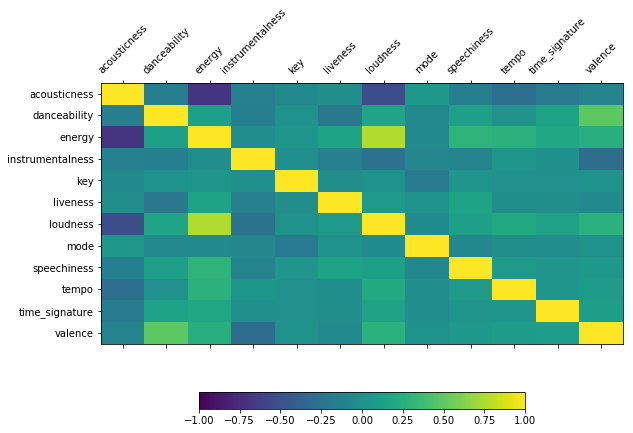

In [32]:
music_data_relevant_no_target=music_data_relevant.drop(['popularity'], 1)
music_correlation=music_data_relevant_no_target.corr(method='spearman')

music_columns = list(music_correlation)

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
cax = ax.matshow(music_correlation, vmin=-1, vmax=1)
fig.colorbar(cax,orientation='horizontal',fraction=.05)
ticks = np.arange(0,12,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
# ax.set_xticklabels(range(1,13))
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
ax.set_xticklabels(music_columns)
ax.set_yticklabels(music_columns)
ax.set_aspect(0.5)
plt.show()

In [33]:
music_correlation=music_correlation.abs()
upper_music = music_correlation.where(np.triu(np.ones(music_correlation.shape), k=1).astype(np.bool))
# print(upper)

In [34]:
sm = music_correlation.unstack()
som = sm.sort_values(kind="quicksort")
# print (som.values)
for i in range(12*12):
    if (som.values[i]>0.4 and som.values[i]!=1.0):
        print (som.index[i],som[i])

('valence', 'danceability') 0.49465201376030615
('danceability', 'valence') 0.49465201376030615
('loudness', 'acousticness') 0.5235807719820347
('acousticness', 'loudness') 0.5235807719820347
('acousticness', 'energy') 0.6921828160683263
('energy', 'acousticness') 0.6921828160683263
('loudness', 'energy') 0.7622535909101322
('energy', 'loudness') 0.7622535909101322


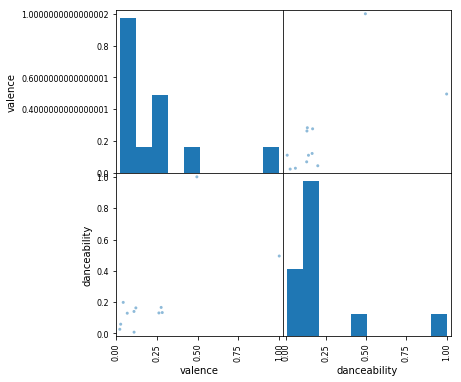

In [35]:
pd_plot2 = music_correlation[['valence', 'danceability']]
pd.plotting.scatter_matrix(pd_plot2, figsize=(6, 6))
plt.show()

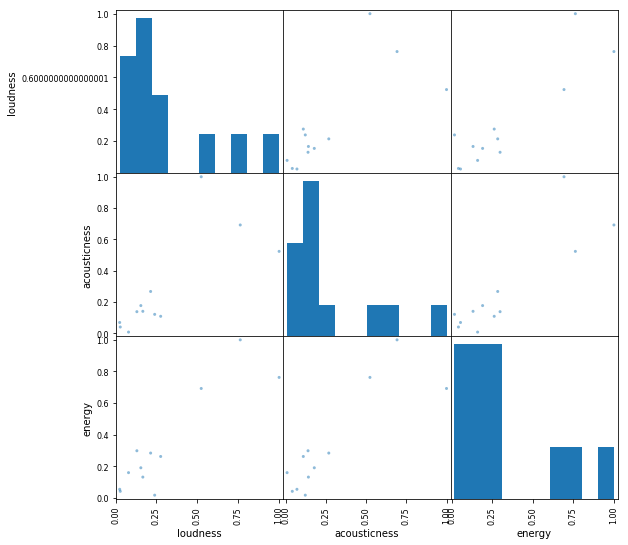

In [36]:
pd_plot3 = music_correlation[['loudness', 'acousticness','energy']]
pd.plotting.scatter_matrix(pd_plot3, figsize=(9, 9))
plt.show()

### we are removing highly correlated features

In [37]:
to_drop_music = [column for column in upper_music.columns if any(upper_music[column] > 0.45)]
print (to_drop_music)
music_data_relevant_no_target_fixcorr = music_data_relevant_no_target.drop(to_drop_music,1)
music_data_relevant_no_target_fixcorr.info()

['energy', 'loudness', 'valence']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3194489 entries, 0 to 3194501
Data columns (total 9 columns):
acousticness        float64
danceability        float64
instrumentalness    float64
key                 int64
liveness            float64
mode                int64
speechiness         float64
tempo               float64
time_signature      float64
dtypes: float64(7), int64(2)
memory usage: 243.7 MB


### looking at low variability 

In [38]:
(music_data_relevant_no_target_fixcorr > 0).all()

acousticness        False
danceability        False
instrumentalness    False
key                 False
liveness            False
mode                False
speechiness         False
tempo               False
time_signature      False
dtype: bool

In [39]:
# music_data_relevant_no_target_fixcorr.plot(kind='hist',subplots=True, sharex=False, sharey=False, figsize=(12,12))
# plt.show()
music_data_relevant_no_target_fixcorr.head()

,acousticness,danceability,instrumentalness,key,liveness,mode,speechiness,tempo,time_signature
0,0.0227,0.739,0.000001,7,0.2290,1,0.0329,124.016,4.0
1,0.2530,0.811,0.000000,5,0.1480,1,0.1290,128.066,4.0
2,0.9560,0.176,0.000120,0,0.1580,1,0.0365,84.741,1.0
3,0.1370,0.866,0.000000,5,0.0843,1,0.0767,118.523,4.0
4,0.8040,0.607,0.000000,9,0.0760,1,0.0404,110.378,4.0


In [40]:
music_data_relevant_no_target_fixcorr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3194489 entries, 0 to 3194501
Data columns (total 9 columns):
acousticness        float64
danceability        float64
instrumentalness    float64
key                 int64
liveness            float64
mode                int64
speechiness         float64
tempo               float64
time_signature      float64
dtypes: float64(7), int64(2)
memory usage: 243.7 MB


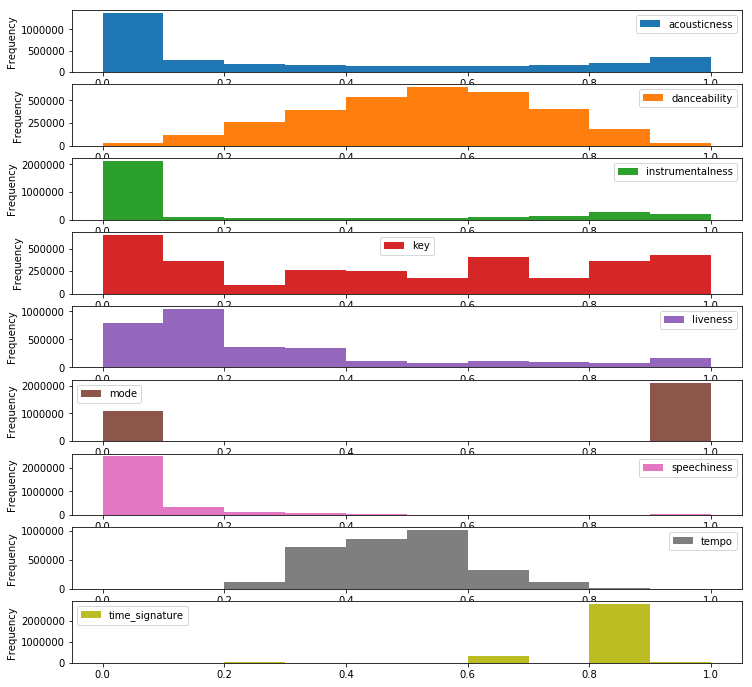

In [41]:
scaled_music_data_relevant_no_target_fixcorr = pd.DataFrame(scaler.fit_transform(music_data_relevant_no_target_fixcorr),columns = music_data_relevant_no_target_fixcorr.columns)
scaled_music_data_relevant_no_target_fixcorr.plot(legend=True,kind='hist',subplots=True, sharex=False, sharey=False, figsize=(12,12))
plt.show()

In [42]:
scaled_music_data_relevant_no_target_fixcorr.head()

,acousticness,danceability,instrumentalness,key,liveness,mode,speechiness,tempo,time_signature
0,0.022791,0.746465,0.000001,0.636364,0.2290,1.0,0.033988,0.496090,0.8
1,0.254016,0.819192,0.000000,0.454545,0.1480,1.0,0.133264,0.512291,0.8
2,0.959839,0.177778,0.000120,0.000000,0.1580,1.0,0.037707,0.338982,0.2
3,0.137550,0.874747,0.000000,0.454545,0.0843,1.0,0.079236,0.474117,0.8
4,0.807229,0.613131,0.000000,0.818182,0.0760,1.0,0.041736,0.441535,0.8


In [43]:
scaled_music_data_relevant_no_target_fixcorr.var() > .1

acousticness         True
danceability        False
instrumentalness     True
key                  True
liveness            False
mode                 True
speechiness         False
tempo               False
time_signature      False
dtype: bool

### drop low variance

In [44]:
lowvardrop_scaled_music_data_relevant_no_target_fixcorr = scaled_music_data_relevant_no_target_fixcorr.loc[:, scaled_music_data_relevant_no_target_fixcorr.var() > .1]
lowvardrop_scaled_music_data_relevant_no_target_fixcorr.head()

,acousticness,instrumentalness,key,mode
0,0.022791,0.000001,0.636364,1.0
1,0.254016,0.000000,0.454545,1.0
2,0.959839,0.000120,0.000000,1.0
3,0.137550,0.000000,0.454545,1.0
4,0.807229,0.000000,0.818182,1.0


### add back the target feature

In [45]:
lowvardrop_scaled_music_data_relevant_with_target_fixcorr = lowvardrop_scaled_music_data_relevant_no_target_fixcorr
lowvardrop_scaled_music_data_relevant_with_target_fixcorr['popularity']=music_data_clean[['popularity']]

cleaned_music_data = pd.DataFrame(scaler.fit_transform(lowvardrop_scaled_music_data_relevant_with_target_fixcorr),columns = lowvardrop_scaled_music_data_relevant_with_target_fixcorr.columns)
cleaned_music_data.head()

/home/alium/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,acousticness,instrumentalness,key,mode,popularity
0,0.022791,0.000001,0.636364,1.0,0.988235
1,0.254016,0.000000,0.454545,1.0,0.847059
2,0.959839,0.000120,0.000000,1.0,0.811765
3,0.137550,0.000000,0.454545,1.0,0.788235
4,0.807229,0.000000,0.818182,1.0,0.800000


### Music data ready

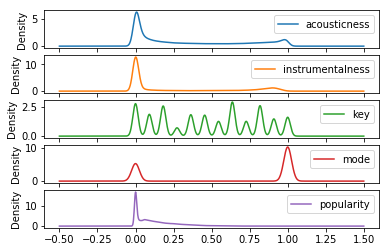

In [46]:
cleaned_music_data.plot(kind='density', subplots=True, sharex=False)
# plt.savefig("1.png")
plt.show()

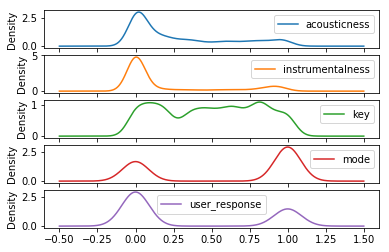

In [276]:
cleaned_user_data.plot(kind='density', subplots=True, sharex=False)
# plt.savefig("2.png")
plt.show()

## PYMC3 Bayesian linear regresion

In [46]:
user_features = cleaned_user_data.get(['acousticness','instrumentalness','key','mode'])
user_target = cleaned_user_data.get(['user_response'])

In [47]:
music_features = cleaned_music_data.get(['acousticness','instrumentalness','key','mode'])
music_target = cleaned_music_data.get(['popularity'])

In [48]:
import pymc3 as pm;

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
/home/alium/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [51]:
linear_Bayesian = pm.Model()

with linear_Bayesian:
    alpha = pm.Normal('alpha', mu=0, sd=10)
    beta = pm.Normal('beta', mu=0, sd=10, shape=4)
    sigma = pm.HalfNormal('sigma', sd=1)
    mu = alpha + beta*music_features
    Y_obs = pm.Normal('Y_obs', mu=mu, sd=sigma, observed=music_target)

In [51]:
map_estimate = pm.find_MAP(model=linear_Bayesian)

map_estimate

/home/alium/anaconda3/lib/python3.6/site-packages/pymc3/tuning/starting.py:61: UserWarning: find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.
  warnings.warn('find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.')
logp = 4.9677e+06, ||grad|| = 48,098: 100%|██████████| 15/15 [00:17<00:00,  1.45it/s]        


{'alpha': array(0.12369012),
 'beta': array([-0.02360802, -0.04234041, -0.00947091, -0.00507947]),
 'sigma': array(0.13521127),
 'sigma_log__': array(-2.00091679)}

In [ ]:
with linear_Bayesian:
    linear_Bayesian_trace = pm.sample(100, chains=2, nuts_kwargs=dict(target_accept=.95))

Only 100 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, beta, alpha]
Sampling 2 chains:   8%|▊         | 99/1200 [04:25<52:34,  2.87s/draws]  

In [ ]:
pm.summary(linear_Bayesian_trace).round(5)

In [ ]:
pm.traceplot(linear_Bayesian_trace);
# plt.savefig("3.png")
plt.show()

In [ ]:
with linear_Bayesian:
    linear_Bayesian_trace_slicing = pm.sample(5000, step=pm.Slice())

In [ ]:
pm.summary(linear_Bayesian_trace_slicing).round(5)

In [ ]:
pm.traceplot(linear_Bayesian_trace_slicing);
# plt.savefig("4.png")
plt.show()

## PYMC3 Bayesian logistic linear regresion

In [ ]:
basic_logistic_model = pm.Model()

with basic_logistic_model:
    alpha = pm.Normal('alpha', mu=0, sd=10)
    beta = pm.Normal('beta', mu=0, sd=10, shape=4)
    sigma = pm.HalfNormal('sigma', sd=1)
    mu = pm.math.sigmoid(alpha+beta*user_features)
    Y_obs = pm.Normal('Y_obs', mu=mu, sd=sigma, observed=user_target)

In [ ]:
map_estimate = pm.find_MAP(model=basic_logistic_model)

map_estimate

In [ ]:
with basic_logistic_model:

    # instantiate sampler
    step = pm.Slice()

    # draw 5000 posterior samples
    trace = pm.sample(5000, step=step)

In [ ]:
pm.traceplot(trace);
# plt.savefig("5.png")
plt.show()

In [ ]:
pm.summary(trace).round(2)